## In this dataset, the data represents a collection of pairs of house sizes (area) and their values (price). Such that each row in the dataset represents a data point with the corresponding house area ranging from 1527.65 to 2920.16 and its actual price ranging from 382994.25 to 730870.84.


## The dataset contains 100 examples, these examples will be used to analyze the relationship between the area of a house and its associated price, in order to build a predictive linear regression model.

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Load the dataset.
house_prices_df=pd.read_csv("house_prices_dataset.csv")

The dimensions of house_prices_df is: (100, 2) 

The head of the dataset:
       area      price
0  2231.88  558852.17
1  2524.92  632260.29
2  1527.65  382994.25
3  1986.09  497607.86
4  2920.16  730870.84 

Statistical properties of the dataset:
              area          price
count   100.00000     100.000000
mean   2247.97960  562990.340700
std     453.86445  113464.467239
min    1522.16000  381657.070000
25%    1812.84750  454164.525000
50%    2284.15000  571887.305000
75%    2617.72750  655407.227500
max    2995.40000  749686.490000 



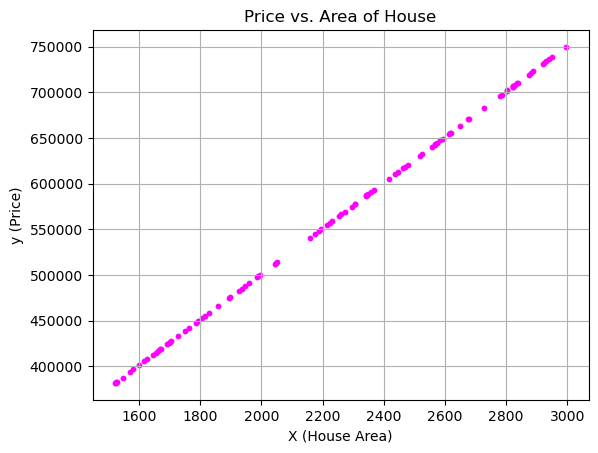

In [3]:
# Explore the dataset.
# 1. Display the dimensions of the dataset.
print('The dimensions of house_prices_df is:', house_prices_df.shape, '\n')

# 2. Display the head of the dataset.
print('The head of the dataset:\n', house_prices_df.head(), '\n')

# 3. Describe the statistical properties of the dataset.
print('Statistical properties of the dataset:\n', house_prices_df.describe(), '\n')

# 4. Extract the input feature into X and the target into y.
X = house_prices_df['area'].values
y = house_prices_df['price'].values

# 5. Draw a scatter plot showing the feature X against the target y.
plt.scatter(X, y, color="magenta", s=10)

# Set the title
plt.title("Price vs. Area of House")

# Set the x-axis label
plt.xlabel('X (House Area)')

# Set the y-axis label
plt.ylabel('y (Price)')

plt.grid()
plt.show()

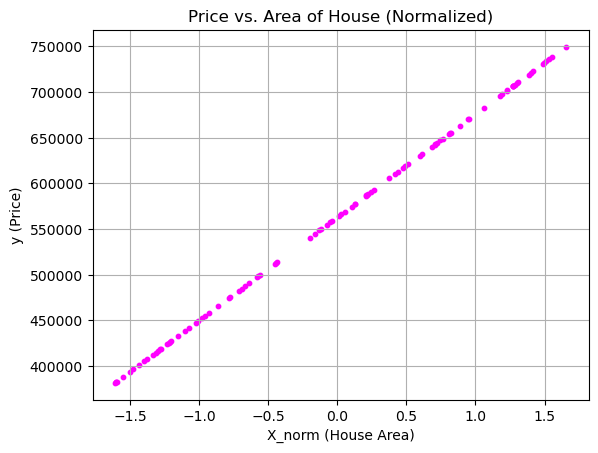

In [4]:
# Apply standardization to the input features.

mu = np.mean(X) # finding the mean
sigma = np.std(X) # finding the standard deviation
X_norm = (X - mu)/ sigma

# Plot the data after standardization.
plt.scatter(X_norm, y, color="magenta", s=10)

# Set the title
plt.title("Price vs. Area of House (Normalized)")

# Set the x-axis label
plt.xlabel('X_norm (House Area)')

# Set the y-axis label
plt.ylabel('y (Price)')

plt.grid()
plt.show()

Theta_0 = 
 1003.8490972928703
Theta_1 = 
 [249.99625958]


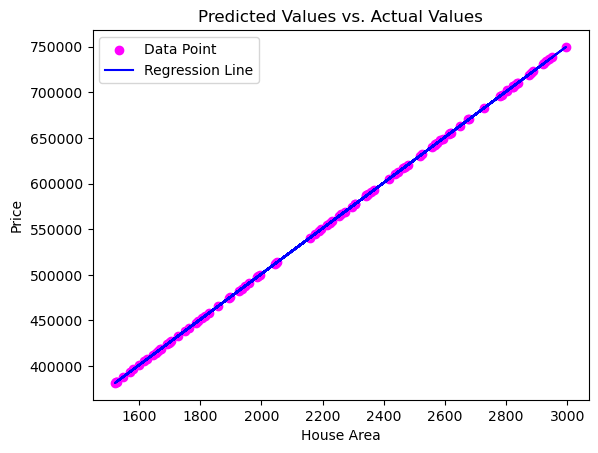

In [5]:
# Learn a new regression model from SkLearn library

regr = LinearRegression()
# Train the model using the dataset
regr.fit(X, y)

#Display the values of theta0 and theat1 obtained.
print("Theta_0 = \n", regr.intercept_) 
print("Theta_1 = \n", regr.coef_)

#Plot the predicted versus actual values.
plt.scatter(X, y, color="magenta")
plt.plot(X, regr.predict(X), color="blue")

# Set the title and legend
plt.title("Predicted Values vs. Actual Values")
plt.legend(["Data Point", "Regression Line"])

# Set the x-axis label
plt.xlabel('House Area')

# Set the y-axis label
plt.ylabel('Price')

plt.show()

In [6]:
#Implement univariate linear regression using the normal equation.
m = X.shape[0] #number of instances i.e., no. of training examples
X_NormalEq = np.column_stack((np.ones(m), X_norm)) #Adding a column of ones to X(normalized) for the intercept
theta = np.linalg.inv(X_NormalEq.T.dot(X_NormalEq)).dot(X_NormalEq.T).dot(y)

# Display the values of theta_0 and theta_1 obtained.
print("Theta_0 = \n", theta[0])
print("Theta_1 = \n", theta[1])

Theta_0 = 
 562990.3407000001
Theta_1 = 
 112895.6673293369


Theta_0 =  562966.0357047117
Theta_1 =  112890.79348255106


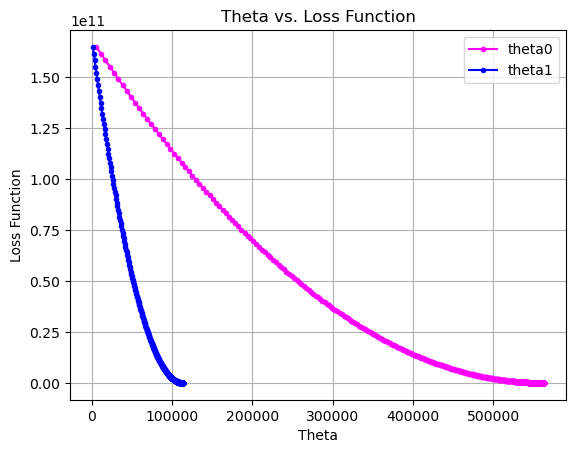

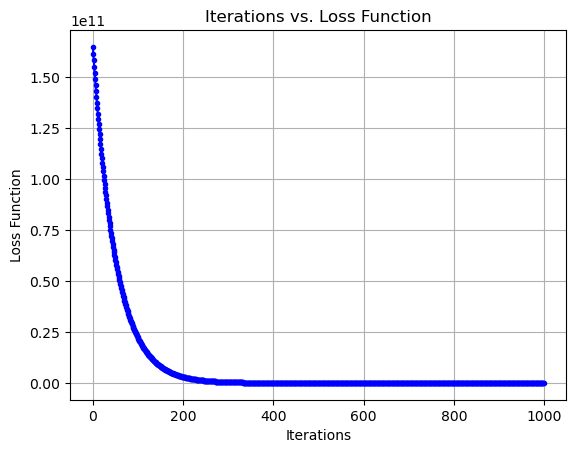

In [7]:
# Code the batch gradient descent algorithm
learningRate = 0.01
iterations = 1000
theta_0 = 0  # Initialized as zero
theta_1 = 0  # Initialized as zero

m = X.shape[0] #number of instances i.e., no. of training examples
costs = []  # List to store cost values i.e., change in loss function
theta0Values = []  # List to store theta_0 values over the iterations
theta1Values = []  # List to store theta_1 values over the iterations

X = np.column_stack((np.ones(m), X_norm)) #Adding a column of ones to X(normalized) for the intercept i.e., theta_0

# computing loss function / batch gradient descent
for i in range(iterations):
    total_cost = 0
    dj_theta_0 = 0
    dj_theta_1 = 0
        
    for j in range(m):
        predicted = theta_0 + theta_1 * X[j, 1]
        error = predicted - y[j]

        dj_theta_0 += error
        dj_theta_1 += error * X[j, 1]

        total_cost += error**2
        
    cost = (1 / (2 * m)) * total_cost
        
    costs.append(cost)
        
        
    theta_0 -= (learningRate / m) * dj_theta_0
    theta_1 -= (learningRate / m) * dj_theta_1

    theta0Values.append(theta_0)
    theta1Values.append(theta_1)

# Display the values of theta0 and theta1 obtained.
print("Theta_0 = ", theta_0)
print("Theta_1 = ", theta_1)

# Plot the change in the loss function with respect to theta_0 and theta_1.
plt.plot(theta0Values, costs, color="magenta", marker='o', linestyle='-', markersize=3)
plt.plot(theta1Values, costs, color="blue", marker='o', linestyle='-', markersize=3)
plt.xlabel('Theta')
plt.ylabel('Loss Function')
plt.title('Theta vs. Loss Function')
plt.legend(["theta0", "theta1"])
plt.grid()
plt.show()

# Plot the change in the loss function with respect to the iteration number.
plt.plot(range(iterations), costs, color="blue", marker='o', linestyle='-', markersize=3)
plt.xlabel('Iterations')
plt.ylabel('Loss Function')
plt.title('Iterations vs. Loss Function')
plt.grid()
plt.show()

In [8]:
# predict and print the price of a house having an area of 2000.
Area = 2000
#Using trained SkLearn model.
print("Predicted house price with area = ", Area, "using SkLearn Library is: ", regr.predict(np.array([[Area]])))

# Normalized Area
Area_norm = (Area - mu) / sigma

# Using the normal equation
print("Predicted house price with area = ", Area, "using Normal Equation is: ", theta[0] + theta[1] * Area_norm)

# Using the batch gradient descent approach
print("Predicted house price with area = ", Area, "using Gradient Descent is: ", theta_0 + theta_1 * Area_norm)

Predicted house price with area =  2000 using SkLearn Library is:  [500996.3682489]
Predicted house price with area =  2000 using Normal Equation is:  500996.36824889656
Predicted house price with area =  2000 using Gradient Descent is:  500974.7396107308
